In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from implementations import * 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# import some data to test the functions
from helpers import *

x, y, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(x)
tx = build_poly(x, 1)

y.shape, x.shape, tx.shape

((10000,), (10000,), (10000, 2))

(15.385887871354932, array([ 73.2938521 ,  13.47969958]))

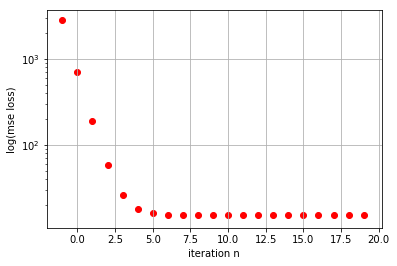

In [14]:
# gradient descent
initial_w = np.array([0, 0])
max_iters = 20
gamma = 0.5
loss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, print_output=False, plot_losses=True)
loss,w

(16.442238877742859, array([ 73.03762193,  14.91045081]))

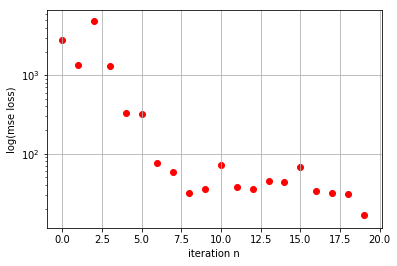

In [15]:
# stochastic gradient descent
# gradient descent
initial_w = np.array([0, 0])
max_iters = 20
gamma = 0.5
loss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, batch_size=1, print_output=False, plot_losses=True)
loss,w

In [16]:
# analityc solution
least_squares(y, tx)

(15.3858878688294, array([ 73.293922  ,  13.47971243]))

In [17]:
# ridge regression to choose smaller weights (the simpler the model the better)
lambda_ = 0.02 # how to properly choose lambda?
ridge_regression(y, tx, lambda_)

(19.493655361271703, array([ 70.474925  ,  12.96126196]))